In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import RBMCat
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [28]:
X = [
    [0, 0, 1, 1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1],
]
X = np.array(X)
cat = [(0, 3), (3, 6), (6, 8)]
W, b_v, b_h, loss_df = RBMCat.RBM_train(X, cat, max_iters=10)

100%|██████████| 10/10 [00:00<00:00, 660.37it/s]

Epoch 0, error 4.666666666666667
Epoch 1, error 3.0
Epoch 2, error 2.6666666666666665
Epoch 3, error 3.3333333333333335
Epoch 4, error 3.0
Epoch 5, error 4.0
Epoch 6, error 2.0
Epoch 7, error 3.0
Epoch 8, error 2.3333333333333335
Epoch 9, error 2.0


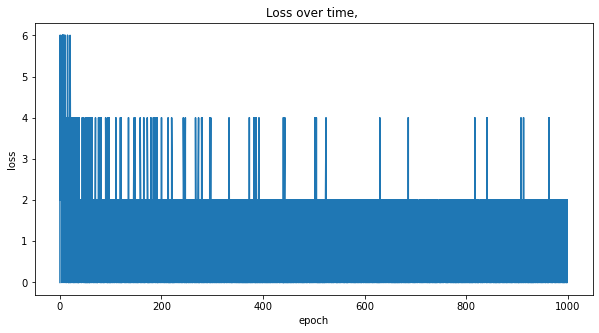

In [42]:
RBMCat.plot_loss(loss_df)

In [51]:
n_samples = 1000
sample = RBMCat.sample(n_samples, W, b_v, b_h, cat)
np.unique(sample, axis=0, return_counts=True)

(array([[0., 0., 1., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 0., 1., 1., 0., 0., 0., 1.],
        [0., 1., 0., 0., 1., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 1.]]),
 array([324, 315,   1, 355,   1,   3]))

In [29]:
import sdgym
from sdgym.synthesizers import Identity, Independent

metrics = ['CSTest', 'BNLogLikelihood', 'DiscreteKLDivergence']
synthesizers = [Identity, Independent, RBMCat.RBMCat]
scores = sdgym.run(synthesizers=synthesizers, datasets=['adult'], metrics=metrics)


  5%|▌         | 1/20 [00:20<06:22, 20.11s/it]

Epoch 0, error 10.5625



 10%|█         | 2/20 [00:40<06:02, 20.13s/it]

Epoch 1, error 9.65625



 15%|█▌        | 3/20 [01:00<05:42, 20.15s/it]

Epoch 2, error 9.53125



 20%|██        | 4/20 [01:20<05:22, 20.16s/it]

Epoch 3, error 9.28125



 25%|██▌       | 5/20 [01:40<05:02, 20.18s/it]

Epoch 4, error 8.625



 30%|███       | 6/20 [02:01<04:42, 20.17s/it]

Epoch 5, error 7.71875



 35%|███▌      | 7/20 [02:21<04:22, 20.19s/it]

Epoch 6, error 7.375



 40%|████      | 8/20 [02:41<04:02, 20.18s/it]

Epoch 7, error 7.65625



 45%|████▌     | 9/20 [03:01<03:42, 20.19s/it]

Epoch 8, error 7.40625



 50%|█████     | 10/20 [03:21<03:22, 20.20s/it]

Epoch 9, error 6.65625



 55%|█████▌    | 11/20 [03:42<03:01, 20.22s/it]

Epoch 10, error 7.75



 60%|██████    | 12/20 [04:02<02:41, 20.22s/it]

Epoch 11, error 6.8125



 65%|██████▌   | 13/20 [04:22<02:21, 20.22s/it]

Epoch 12, error 7.4375



 70%|███████   | 14/20 [04:42<02:01, 20.23s/it]

Epoch 13, error 7.6875



 75%|███████▌  | 15/20 [05:03<01:41, 20.24s/it]

Epoch 14, error 7.71875



 80%|████████  | 16/20 [05:23<01:20, 20.24s/it]

Epoch 15, error 7.34375



 85%|████████▌ | 17/20 [05:43<01:00, 20.26s/it]

Epoch 16, error 6.84375



 90%|█████████ | 18/20 [06:04<00:40, 20.30s/it]

Epoch 17, error 7.25



 95%|█████████▌| 19/20 [06:24<00:20, 20.33s/it]

Epoch 18, error 7.1875



100%|██████████| 20/20 [06:44<00:00, 20.24s/it]

Epoch 19, error 7.09375


[['Private' 'Bachelors' 'Married-spouse-absent' ... 'Male'
  'United-States' '>50K']
 ['Self-emp-inc' 'Bachelors' 'Married-AF-spouse' ... 'Female'
  'United-States' '<=50K']
 ['Private' 'Bachelors' 'Never-married' ... 'Male' 'Nicaragua' '<=50K']
 ...
 ['Self-emp-not-inc' 'Bachelors' 'Never-married' ... 'Female'
  'United-States' '<=50K']
 ['Local-gov' 'Assoc-voc' 'Separated' ... 'Male' 'United-States' '>50K']
 ['Private' 'Some-college' 'Married-civ-spouse' ... 'Female'
  'United-States' '<=50K']]


In [30]:
scores

,synthesizer,dataset,modality,iteration,metric,error,score,metric_time,model_time,run_id
0,Identity,adult,single-table,0,CSTest,None,1.000000,0.027300,0.000483,db02d690-7
1,Identity,adult,single-table,0,BNLogLikelihood,None,-8.855857,5.148546,0.000483,db02d690-7
2,Identity,adult,single-table,0,DiscreteKLDivergence,None,1.000000,0.944180,0.000483,db02d690-7
0,Independent,adult,single-table,0,CSTest,None,0.999832,0.027196,0.463960,db02d690-7
1,Independent,adult,single-table,0,BNLogLikelihood,None,-15.096171,5.118632,0.463960,db02d690-7
2,Independent,adult,single-table,0,DiscreteKLDivergence,None,0.889489,0.944782,0.463960,db02d690-7
0,RBMCat,adult,single-table,0,CSTest,None,0.994542,0.027253,425.304456,db02d690-7
1,RBMCat,adult,single-table,0,BNLogLikelihood,None,-15.483217,5.094831,425.304456,db02d690-7
2,RBMCat,adult,single-table,0,DiscreteKLDivergence,None,0.788221,0.953515,425.304456,db02d690-7


In [24]:
metrics = ['CSTest', 'BNLogLikelihood', 'DiscreteKLDivergence']
synthesizers = [Identity, Independent, RBMCat.RBMCat]
scores = sdgym.run(synthesizers=synthesizers, datasets=['asia'], metrics=metrics)
scores


  5%|▌         | 1/20 [00:10<03:18, 10.46s/it]

Epoch 0, error 3.34375



 10%|█         | 2/20 [00:20<03:08, 10.45s/it]

Epoch 1, error 3.0625



 15%|█▌        | 3/20 [00:31<02:57, 10.46s/it]

Epoch 2, error 4.1875



 20%|██        | 4/20 [00:41<02:47, 10.45s/it]

Epoch 3, error 3.28125



 25%|██▌       | 5/20 [00:52<02:36, 10.44s/it]

Epoch 4, error 3.15625



 30%|███       | 6/20 [01:02<02:26, 10.44s/it]

Epoch 5, error 3.34375



 35%|███▌      | 7/20 [01:13<02:15, 10.44s/it]

Epoch 6, error 2.1875



 40%|████      | 8/20 [01:23<02:05, 10.44s/it]

Epoch 7, error 2.34375



 45%|████▌     | 9/20 [01:34<01:54, 10.45s/it]

Epoch 8, error 2.125



 50%|█████     | 10/20 [01:44<01:44, 10.47s/it]

Epoch 9, error 2.125



 55%|█████▌    | 11/20 [01:55<01:34, 10.47s/it]

Epoch 10, error 2.3125



 60%|██████    | 12/20 [02:05<01:23, 10.48s/it]

Epoch 11, error 2.46875



 65%|██████▌   | 13/20 [02:15<01:13, 10.48s/it]

Epoch 12, error 2.0625



 70%|███████   | 14/20 [02:26<01:02, 10.48s/it]

Epoch 13, error 2.15625



 75%|███████▌  | 15/20 [02:36<00:52, 10.48s/it]

Epoch 14, error 2.125



 80%|████████  | 16/20 [02:47<00:41, 10.48s/it]

Epoch 15, error 2.8125



 85%|████████▌ | 17/20 [02:57<00:31, 10.47s/it]

Epoch 16, error 2.21875



 90%|█████████ | 18/20 [03:08<00:20, 10.47s/it]

Epoch 17, error 1.8125



 95%|█████████▌| 19/20 [03:18<00:10, 10.47s/it]

Epoch 18, error 2.0625



100%|██████████| 20/20 [03:29<00:00, 10.46s/it]

Epoch 19, error 1.96875


[['no' 'no' 'yes' ... 'yes' 'no' 'yes']
 ['no' 'no' 'yes' ... 'no' 'no' 'no']
 ['no' 'no' 'yes' ... 'no' 'no' 'no']
 ...
 ['no' 'no' 'yes' ... 'no' 'no' 'no']
 ['no' 'no' 'yes' ... 'no' 'no' 'yes']
 ['no' 'no' 'no' ... 'no' 'no' 'no']]


,synthesizer,dataset,modality,iteration,metric,error,score,metric_time,model_time,run_id
0,Identity,asia,single-table,0,CSTest,None,1.000000,0.015942,0.000232,c477cca0-0
1,Identity,asia,single-table,0,BNLogLikelihood,None,-2.236680,2.501837,0.000232,c477cca0-0
2,Identity,asia,single-table,0,DiscreteKLDivergence,None,1.000000,0.466889,0.000232,c477cca0-0
0,Independent,asia,single-table,0,CSTest,None,0.994398,0.015621,0.023298,c477cca0-0
1,Independent,asia,single-table,0,BNLogLikelihood,None,-4.939449,2.503420,0.023298,c477cca0-0
2,Independent,asia,single-table,0,DiscreteKLDivergence,None,0.944769,0.468628,0.023298,c477cca0-0
0,RBMCat,asia,single-table,0,CSTest,None,1.000000,0.015214,220.249259,c477cca0-0
1,RBMCat,asia,single-table,0,BNLogLikelihood,None,-3.492443,2.500742,220.249259,c477cca0-0
2,RBMCat,asia,single-table,0,DiscreteKLDivergence,None,1.000000,0.464554,220.249259,c477cca0-0


In [25]:
metrics = ['CSTest', 'BNLogLikelihood', 'DiscreteKLDivergence']
synthesizers = [Identity, Independent, RBMCat.RBMCat]
scores = sdgym.run(synthesizers=synthesizers, datasets=['census'], metrics=metrics)
scores

Metric BNLogLikelihood failed on dataset census. Skipping.
Traceback (most recent call last):
  File "/home/yuchao/anaconda3/lib/python3.8/site-packages/sdgym/benchmark.py", line 77, in _compute_scores
    score = metric.compute(*metric_args)
  File "/home/yuchao/anaconda3/lib/python3.8/site-packages/sdmetrics/single_table/bayesian_network.py", line 184, in compute
    likelihoods = cls._likelihoods(real_data, synthetic_data, metadata, structure)
  File "/home/yuchao/anaconda3/lib/python3.8/site-packages/sdmetrics/single_table/bayesian_network.py", line 55, in _likelihoods
    bn = BayesianNetwork.from_samples(real_data[fields].to_numpy(), algorithm='chow-liu')
  File "pomegranate/BayesianNetwork.pyx", line 1134, in pomegranate.BayesianNetwork.BayesianNetwork.from_samples
ValueError: Chow-Liu tree learning does not current support missing values
Metric BNLogLikelihood failed on dataset census. Skipping.
Traceback (most recent call last):
  File "/home/yuchao/anaconda3/lib/python3.8/sit

,synthesizer,dataset,modality,iteration,metric,error,score,metric_time,model_time,run_id
0,Identity,census,single-table,0,CSTest,None,1,0.955695,0.043939,ad0a62cf-d
1,Identity,census,single-table,0,BNLogLikelihood,ValueError: Chow-Liu tree learning does not cu...,NaN,3.000919,0.043939,ad0a62cf-d
2,Identity,census,single-table,0,DiscreteKLDivergence,None,1,103.111152,0.043939,ad0a62cf-d
0,Independent,census,single-table,0,CSTest,None,0.99994,0.965766,8.64878,ad0a62cf-d
1,Independent,census,single-table,0,BNLogLikelihood,ValueError: Chow-Liu tree learning does not cu...,NaN,2.985164,8.64878,ad0a62cf-d
2,Independent,census,single-table,0,DiscreteKLDivergence,None,0.851062,103.156726,8.64878,ad0a62cf-d
0,RBMCat,census,single-table,0,NaN,ValueError: Input contains NaN,None,NaN,None,ad0a62cf-d
